In [10]:
import numpy as np
import tensorflow as tf
import tflearn
import tflearn.datasets.mnist as mnist

#tflearn : high-level library nuilt on top of tensorflow to build the neural network

In [11]:
#Retrieving training and test data

#Flattened data : We will use flattened data that is image od one dimension rather that two
#Flattened data : one dimensional array of 784 pixel values
#mnist after flattened : [55000, 784]

#Retrieve the training and test data
trainX, trainY, testX, testY = mnist.load_data(one_hot=True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


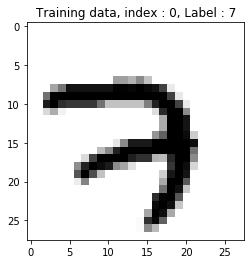

In [14]:
# Visualize the training data

import matplotlib.pyplot as plt
%matplotlib inline

#function for displaying a training image by it's index in the mnist set
def display_digit(index):
    label = trainY[index].argmax(axis=0)
    
    #reshape 784 array into 28 * 28 image
    image = trainX[index].reshape([28, 28])
    plt.title("Training data, index : %d, Label : %d" % (index, label))
    plt.imshow(image, cmap = 'gray_r')
    plt.show()
    
display_digit(0)

In [17]:
#Building the network

# 1. Input layer : tell the network the number of inputs, it should expect for each piece of MNIST data
# 2. Hidden layers : layers recognize pattern in data and connect the input to the output layer
# 3. output layer : defines how the network learns and outputs a label for a given image

def build_model():
    #reset all the parameters, and variables
    tf.reset_default_graph()
    
    #Inputs
    net = tflearn.input_data([None, trainX.shape[1]])
    
    #hidden layers
    net = tflearn.fully_connected(net, 128, activation = 'ReLU')
    net = tflearn.fully_connected(net, 32, activation = 'ReLU')
    
    #output layer
    net = tflearn.fully_connected(net, 10, activation = 'softmax')
    net = tflearn.regression(net, optimizer = 'sgd', learning_rate = 0.01, loss = 'categorical_crossentropy')
    
    model = tflearn.DNN(net)
    
    return model

In [18]:
#Build the model
model = build_model()

W0120 17:16:36.950870 4715935168 deprecation_wrapper.py:119] From //anaconda3/envs/deeplearning/lib/python3.7/site-packages/tflearn/layers/core.py:81: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0120 17:16:36.958214 4715935168 deprecation.py:506] From //anaconda3/envs/deeplearning/lib/python3.7/site-packages/tflearn/initializations.py:174: calling TruncatedNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0120 17:16:37.012901 4715935168 deprecation_wrapper.py:119] From //anaconda3/envs/deeplearning/lib/python3.7/site-packages/tflearn/optimizers.py:135: The name tf.train.GradientDescentOptimizer is deprecated. Please use tf.compat.v1.train.GradientDescentOptimizer instead.

W0120 17:16:37.022512 4715935168 deprecation.py:506] From //anaconda3/envs/deeplearning

In [19]:
#Training the network

#training
model.fit(trainX, trainY, validation_set = 0.1, show_metric = True, batch_size = 100, n_epoch = 100)

Training Step: 49499  | total loss: 0.05762 | time: 2.849s
| SGD | epoch: 100 | loss: 0.05762 - acc: 0.9863 -- iter: 49400/49500
Training Step: 49500  | total loss: 0.05547 | time: 3.875s
| SGD | epoch: 100 | loss: 0.05547 - acc: 0.9866 | val_loss: 0.10337 - val_acc: 0.9722 -- iter: 49500/49500
--


In [22]:
#Testing

#Find the indices of the most confident prediction for each item. 
predictions = np.array(model.predict(testX)).argmax(axis = 1)

#calculate accuracy
actual = testY.argmax(axis=1)
test_accuracy = np.mean(predictions == actual, axis = 0)

#print result
print("Test accuracy: ", test_accuracy)

Test accuracy:  0.9711
